Importação das bases de Dados e Bibliotecas

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',', encoding='latin1')
clientes_df = pd.read_csv('CadastroClientes.csv', sep=';', decimal=',', encoding='latin1')
servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx') 

funcionarios_df = funcionarios_df.rename(columns={'ï»¿ID FuncionÃ¡rio': 'ID Funcionário'})
clientes_df = clientes_df.rename(columns={'ï»¿ID Cliente': 'ID Cliente'})


display(funcionarios_df)
display(clientes_df)
display(servicos_df)

,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,OperaÃ§Ãµes
1,2,C,JoÃ£o Haddad,5404,2702.0,1080.8,154,574.56,EstagiÃ¡rio,LogÃ­stica
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,EstagiÃ¡rio,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo
...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,LogÃ­stica
110,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,EstagiÃ¡rio,Comercial
111,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo
112,149,C,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,EstagiÃ¡rio,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira GonÃ§alves,540
1,2,Souza Santos,1260
2,3,EmÃ­dio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


Folha Salarial

In [21]:
funcionarios_df['Salário Total'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['VT'] + funcionarios_df['VR'] + funcionarios_df['Beneficios']
salario_total = funcionarios_df['Salário Total'].sum()
print("O Total da Folha Salarial Mensal é de R${:,} com todos os funcionários".format(salario_total))

O Total da Folha Salarial Mensal é de R$2,717,493.22 com todos os funcionários


Faturamento da Empresa

In [20]:
# Renomear a coluna 'ï»¿ID Cliente' para 'ID Cliente' em clientes_df
clientes_df.rename(columns={'ï»¿ID Cliente': 'ID Cliente'}, inplace=True)

# Verificar as colunas após a renomeação
print("Colunas em clientes_df após renomeação:", clientes_df.columns)

# Selecionar colunas específicas de servicos_df
servicos_selecionados_df = servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']]

# Realizar a junção dos DataFrames
faturamentos_df = servicos_selecionados_df.merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']], on='ID Cliente')

# Exibir o DataFrame resultante da junção
display(faturamentos_df)
faturamentos_df['Faturamento Total'] = faturamentos_df['Tempo Total de Contrato (Meses)'] * faturamentos_df['Valor Contrato Mensal']
faturamento_total_empresa = (faturamentos_df['Faturamento Total'].sum())
print('O Faturamento Total foi de R${:,}'.format(faturamento_total_empresa))

Colunas em clientes_df após renomeação: Index(['ID Cliente', 'Cliente', 'Valor Contrato Mensal'], dtype='object')


,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal
0,1,14,540
1,2,12,1260
2,4,14,2520
3,5,8,3510
4,6,8,2340
...,...,...,...
232,315,4,1575
233,316,8,3690
234,317,6,2385
235,319,14,4185


O Faturamento Total foi de R$5,519,160


% dos Funcionários que já fecharam um contrato

In [23]:
qnt_total_funcionarios_fechados = len(servicos_df['ID Funcionário'].unique())
qnt_total_funcionarios = len(funcionarios_df['ID Funcionário'])
resultado = qnt_total_funcionarios_fechados/ qnt_total_funcionarios
print('Percentual Funcionários com Contrato Fechado é de {:.2%}'.format(resultado))


Percentual Funcionários com Contrato Fechado é de 86.84%


Total de contratos que cada área da empresa já fechou

,ID Funcionário,Area
0,67,Financeiro
1,67,Financeiro
2,67,Financeiro
3,67,Financeiro
4,17,LogÃ­stica
...,...,...
232,25,Administrativo
233,79,OperaÃ§Ãµes
234,99,Administrativo
235,14,Financeiro


Administrativo    63
OperaÃ§Ãµes       48
Comercial         44
Financeiro        42
LogÃ­stica        40
Name: Area, dtype: int64


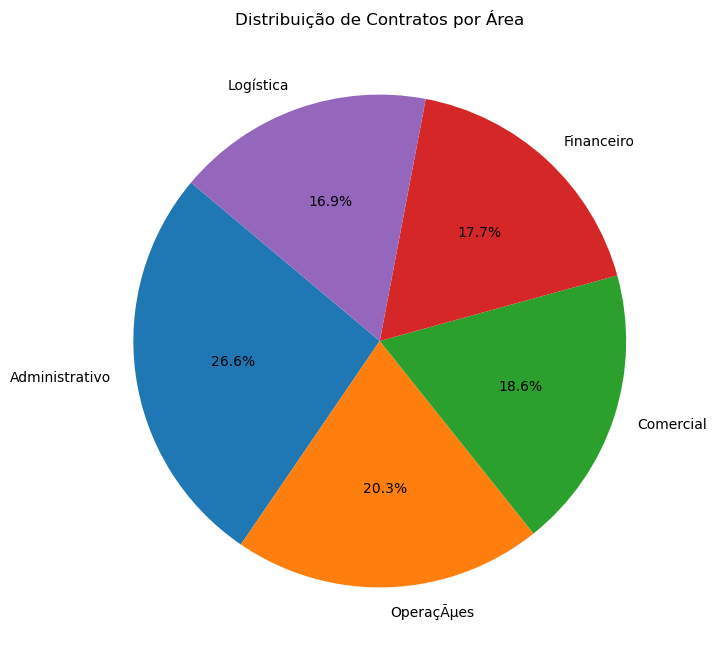

In [31]:
contratos_area_df = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']], on='ID Funcionário')
contratos_area_qtde = contratos_area_df['Area'].value_counts()
display(contratos_area_df)
print(contratos_area_qtde)

contratos_area_qtde.index = contratos_area_qtde.index.str.replace('Ã§', 'ç').str.replace('Ã­', 'í')
plt.figure(figsize=(8, 8))
plt.pie(contratos_area_qtde, labels=contratos_area_qtde.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Contratos por Área')
plt.show()

Total de funcionários por área

Administrativo    26
Comercial         26
OperaÃ§Ãµes       23
LogÃ­stica        21
Financeiro        18
Name: Area, dtype: int64


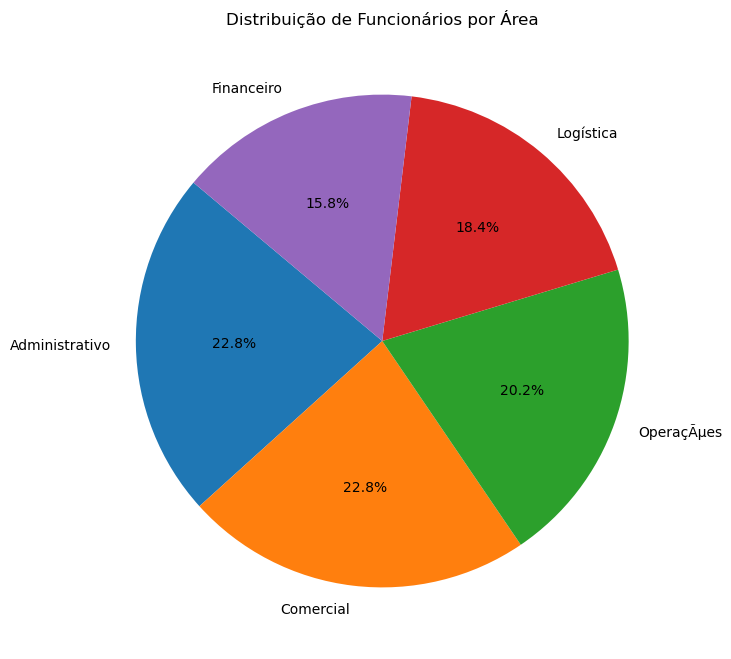

In [33]:
funcionarios_area = funcionarios_df['Area'].value_counts()
print(funcionarios_area)
funcionarios_area.index = funcionarios_area.index.str.replace('Ã§', 'ç').str.replace('Ã­', 'í').str.replace('Ã£', 'ã')
plt.figure(figsize=(8, 8))
plt.pie(funcionarios_area, labels=funcionarios_area.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Funcionários por Área')
plt.show()

Ticket Médio Mensal

In [39]:
ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print('O Ticket Médio é de {}'.format(ticket_medio))

O Ticket Médio é de 2502.5625
